In [1]:
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

import num_gan as ng
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

C:\Users\pinak\Documents\GitHub\GAN


In [2]:
data = np.genfromtxt('../experiments/learning_attractors/attractors/attractor_l63_1000_500.csv', delimiter=',', dtype=np.float32)[:100]
gan = ng.NumGAN(16, 3, 3, 2, name='attractor_sampler')
gan.load(path='../experiments/learning_attractors/l63_attractor_sampler')

In [3]:
mask = np.array([1, 0, 1], dtype=np.float32)
com = ng.NumCompleter(gan, mask, lam=0.01)
#com.load()
com.train(data, 100000, gap=1000, learning_rate=1e-3)

Time for epoch 1000 is 0.000 sec, total loss = 2.872
Time for epoch 2000 is 0.001 sec, total loss = 2.096
Time for epoch 3000 is 0.000 sec, total loss = 1.880
Time for epoch 4000 is 0.010 sec, total loss = 1.742
Time for epoch 5000 is 0.000 sec, total loss = 1.632
Time for epoch 6000 is 0.000 sec, total loss = 1.557
Time for epoch 7000 is 0.000 sec, total loss = 1.497
Time for epoch 8000 is 0.001 sec, total loss = 1.432
Time for epoch 9000 is 0.000 sec, total loss = 1.400
Time for epoch 10000 is 0.000 sec, total loss = 1.376
Time for epoch 11000 is 0.000 sec, total loss = 1.348
Time for epoch 12000 is 0.000 sec, total loss = 1.305
Time for epoch 13000 is 0.000 sec, total loss = 1.246
Time for epoch 14000 is 0.000 sec, total loss = 1.179
Time for epoch 15000 is 0.000 sec, total loss = 1.154
Time for epoch 16000 is 0.000 sec, total loss = 1.140
Time for epoch 17000 is 0.000 sec, total loss = 1.136
Time for epoch 18000 is 0.000 sec, total loss = 1.136
Time for epoch 19000 is 0.000 sec, to

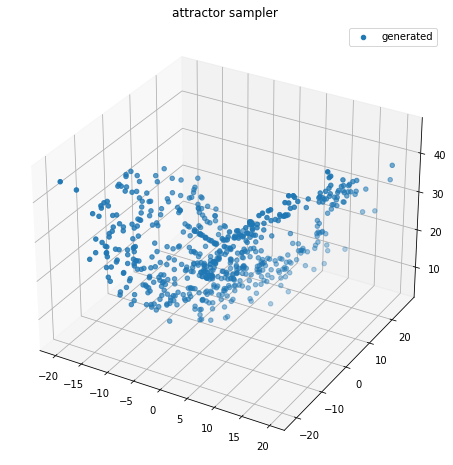

In [4]:
n = 600
noise = tf.random.normal([n, 2])
gen = gan.generator(noise, training=False)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen[:, 0], gen[:, 1], gen[:, 2], label='generated')
#ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.set_title('attractor sampler')
plt.legend()
plt.show()

In [5]:
completed_data = com.complete(data)
y_generated = completed_data[:, 1]
y_true = data[:, 1]
avg_relative_error = np.mean(np.abs((y_generated - y_true)/y_true))
print("Average relative error = {}".format(avg_relative_error))

Average relative error = 1.139162540435791


In [6]:
(y_generated - y_true)/y_true

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 1.80348828e-02,  2.01994085e+00, -1.81822836e+00, -7.67597705e-02,
        3.98444152e-03,  2.36881718e-01,  1.83517039e-02,  9.21712071e-03,
        2.73644496e-02, -8.61112535e-01, -7.01014221e-01, -7.75833786e-01,
        2.22169971e+00,  7.74469599e-03, -8.41907740e-01, -1.59179699e+00,
        8.89566094e-02,  4.65847887e-02, -8.53208918e-03, -1.05113244e+00,
        9.61675763e-01, -3.28279585e-01, -5.70545942e-02,  6.17294293e-03,
        1.94082838e-02, -3.14112997e+00, -9.02843237e-01,  3.98695827e-01,
       -9.11324024e-01, -8.07079002e-02,  1.58021487e-02,  1.32456064e+00,
        8.13648105e-04, -2.83348590e-01,  3.23171705e-01, -5.99584579e-02,
        4.54514241e-03,  6.22817241e-02,  3.22437191e+00, -7.09040284e-01,
       -7.84641564e-01, -6.76890707e+00,  2.86410928e-01, -2.94423640e-01,
       -1.15902408e-03, -3.50377113e-02, -4.24123138e-01, -9.63221490e-03,
        6.95077598e-01,  2.96216249e-01,  1.04962714

In [7]:
n = 1000
pcmp = tf.math.multiply(mask, cmp)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(pcmp[0:n, 0], pcmp[0:n, 1], pcmp[0:n, 2], label='incomplete')
ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.scatter(cmp[0:n, 0], cmp[0:n, 1], cmp[0:n, 2], label='completed')
ax.set_title('attractor sampler')
plt.legend()
plt.show()

NameError: name 'cmp' is not defined

In [ ]:
tf.reduce_mean(tf.keras.losses.mean_absolute_error(data[:1000], cmp))

In [ ]:
pcmp

In [ ]:
data